In [15]:
#!kaggle competitions download -c kaggle competitions download -c kaggle-survey-2020 

In [16]:
#!pip install kaggle

In [17]:
#!kaggle competitions download -c kaggle-survey-2020

In [18]:
#!tar -xvf kaggle-survey-2020.zip -C /Data_Science/2020_Kaggle_survey/data

In [19]:
#! del /f kaggle-survey-2020.zip

In [1]:
# Questions to answer :

In [ ]:
# 1. Age distribution
# Good question to answer --- programmers that use more than 1 language or tool to position and salary.

In [71]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.pylab as pylab

In [72]:
cwd = os.getcwd()
data = cwd + '\\data\\kaggle_survey_2020_responses.csv'
DataFrame = pd.read_csv(data)
np.random.seed(0) 

C:\Users\vanat\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [164]:
DataFrame['Q3'] = DataFrame['Q3'].str.replace('United States of America','USA')
DataFrame['Q3'] = DataFrame['Q3'].str.replace('United Kingdom of Great Britain and Northern Ireland','UK')

def plot_simple_bar(data, x_label, y_label, title):
    # data -- pd.Series to plot
    # x_label -- label of x-axis
    # y_bale -- label of y-axis
    a4_dims = (7, 6)
    fig, ax = pyplot.subplots(figsize=a4_dims) 
    ax.bar(data.index, data, color = 'black')
    ax.set(xlabel=x_label, ylabel=y_label)
    plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
    ax.set_title(title, fontsize=25)
    params = {
         'axes.labelsize': 20,
         'axes.titlesize':20,
         'xtick.labelsize':15,
         'ytick.labelsize':15}
    pylab.rcParams.update(params)
    pyplot.show()
    
def double_chart_plot(data_1, data_2, title_1, title_2):
    # data -- pd.Series to plot
    # data_2 -- pd.Series to plot
    # x_title -- titple of the first chart
    # y_title -- titple of the second chart
    a4_dims = (10, 4)
    fig, ax = pyplot.subplots(1, 2, figsize=a4_dims) 
    ax[0].bar(data_1.index, data_1, color = 'black')
    ax[1].bar(data_2.index, data_2, color = 'black')
    ax[0].set_title(title_1, fontsize=15)
    ax[1].set_title(title_2, fontsize=15)
    plt.setp(ax[0].get_xticklabels(), rotation=30, horizontalalignment='right')
    plt.setp(ax[1].get_xticklabels(), rotation=90, horizontalalignment='right')
    params = {
         'axes.labelsize': 15,
         'axes.titlesize':15,
         'xtick.labelsize':10,
         'ytick.labelsize':10}
    pylab.rcParams.update(params)
    pyplot.show()

def transform_salary_range (value):
    a = ''
    for e in value:
        if e == '0' or e == '1' or e == '2' or e == '3' or e == '4' or e == '5' or e == '6' or e == '7' or e == '8' or e == '9' or e == '-':
            a = a + e
    if '-' in a:
        a = a.split('-')
        return float((int(a[1])+int(a[0]))/2)
    else: 
        return float(a)
    
def multiple_row_plot(data) :
    unique = []
    for e in data.columns:
        a = []
        for e in data[e].fillna(0).unique():
            if e != 0:
                a.append(e)
        unique.append(a[0].split(' ')[0])
    
    Distribution = data.rename(columns=dict(zip(data.columns, unique))).count()
    
    a4_dims = (10, 8)
    fig, ax = pyplot.subplots(figsize=a4_dims) 
    ax.bar(Distribution.index, Distribution,  
                 color = 'black')
    ax.set_title('Role salary distribution in USA')
    plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
    pyplot.show()

def multiple_row_plot_2(data) :
    unique = []
    for e in data.columns:
        a = []
        for e in data[e].fillna(0).unique():
            if e != 0:
                a.append(e)
        unique.append(a[0])
    
    Distribution = data.rename(columns=dict(zip(data.columns, unique))).count()
    
    a4_dims = (10, 8)
    fig, ax = pyplot.subplots(figsize=a4_dims) 
    ax.bar(Distribution.index, Distribution,  
                 color = 'black')
    ax.set_title('Role salary distribution in USA')
    plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
    pyplot.show()
    
def multiple_chart_top_ten(data, order):
    a4_dims = (40, 100)
    fig, ax = pyplot.subplots(5, 2, figsize=a4_dims, constrained_layout=True) 
    for i, country in enumerate(list(data_q6q24.Q3.value_counts()[0:10].index)):
        filtered = data_q6q24[data_q6q24['Q3']==country]['Q24'].value_counts().reindex(q24_order)
        ax[i%5][i//5].bar(filtered.index, filtered,  color = 'black')
        ax[i%5][i//5].set(xlabel='', ylabel='')
        ax[i%5][i//5].set_title(country, fontsize=50)
        plt.setp(ax[i%5][i//5].get_xticklabels(), rotation=90, horizontalalignment='right')
        plt.rc('xtick', labelsize=15)  
        plt.rc('ytick', labelsize=15)
    pyplot.show()
    

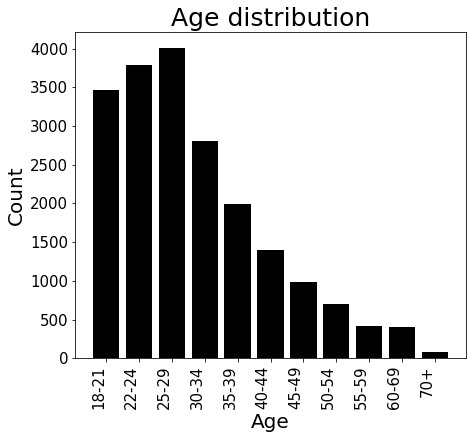

In [125]:
#Age distribution
age_data = DataFrame['Q1'][1:].value_counts().sort_index()
plot_simple_bar(age_data, 'Age', 'Count', "Age distribution")

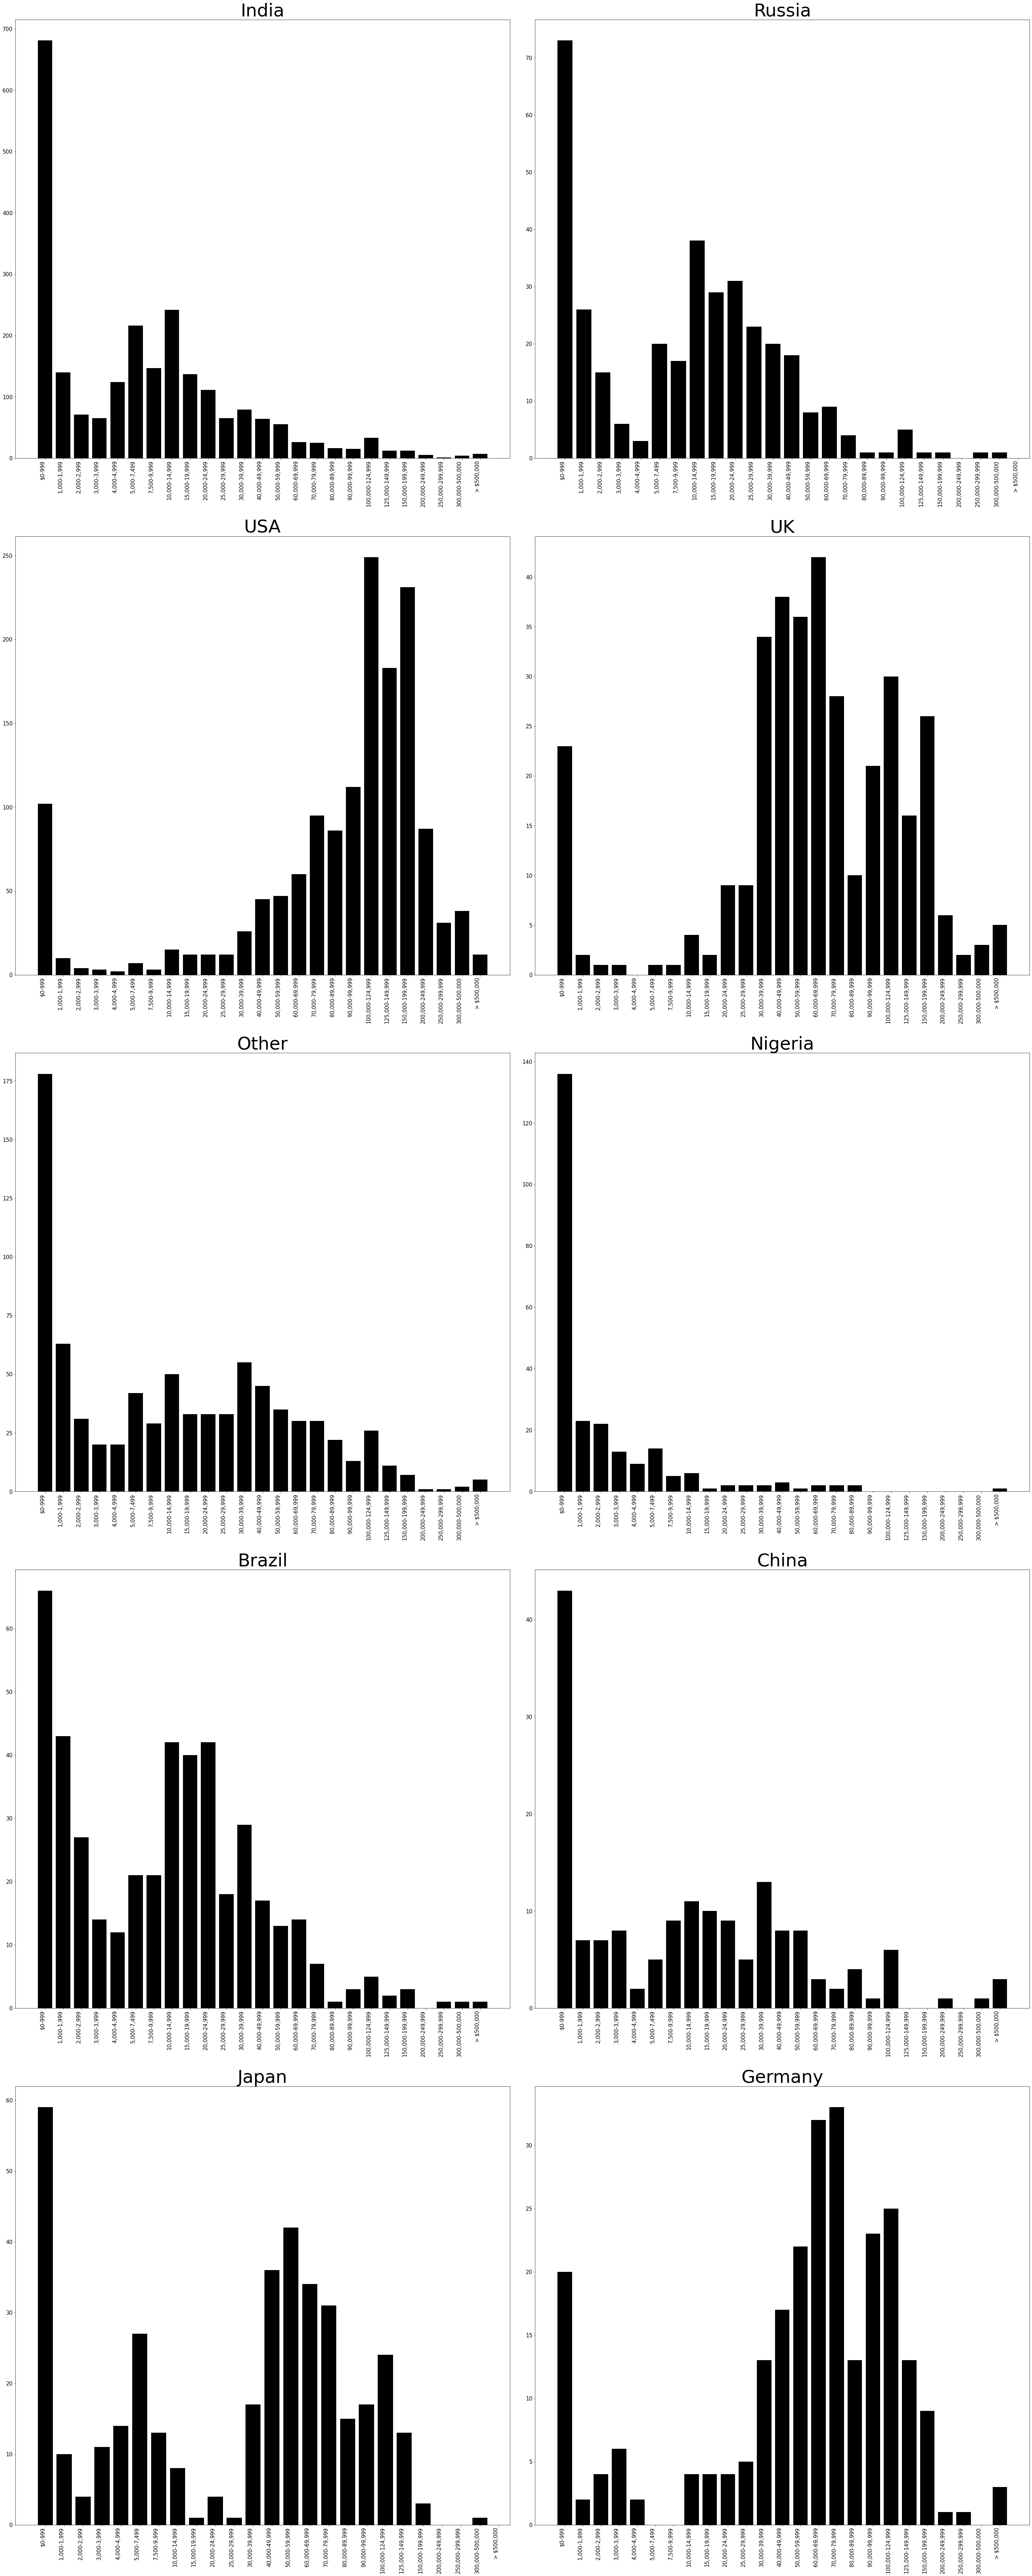

In [165]:
# Salary distribution in top 10 different countries
data_q6q24 = pd.DataFrame(DataFrame, columns=['Q5', 'Q3', 'Q24']).set_index('Q5')[1:]
q24_order = ['$0-999', '1,000-1,999', '2,000-2,999', '3,000-3,999', '4,000-4,999', '5,000-7,499', '7,500-9,999',
'10,000-14,999','15,000-19,999', '20,000-24,999', '25,000-29,999', '30,000-39,999', '40,000-49,999', '50,000-59,999', '60,000-69,999', '70,000-79,999', '80,000-89,999', '90,000-99,999',
'100,000-124,999', '125,000-149,999',  '150,000-199,999', '200,000-249,999',  '250,000-299,999', '300,000-500,000', '> $500,000']
multiple_chart_top_ten(filtered, q24_order)

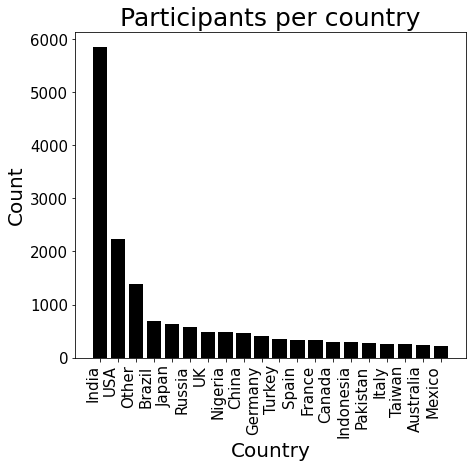

In [132]:
plot_simple_bar(DataFrame['Q3'][1:].value_counts()[0:20], 'Country', 'Count', 'Participants per country')

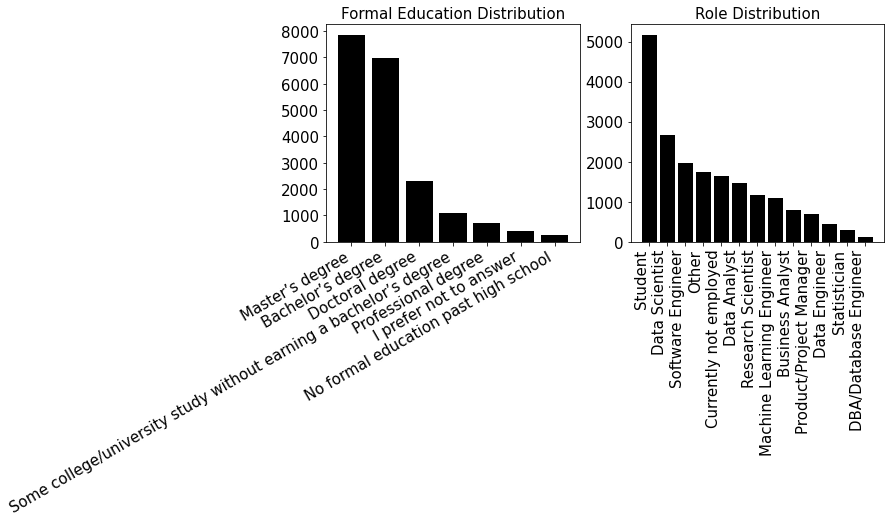

In [128]:
education_data = DataFrame['Q4'][1:].value_counts()
current_role_data = DataFrame['Q5'][1:].value_counts()
double_chart_plot(education_data, current_role_data, 'Formal Education Distribution', 'Role Distribution')

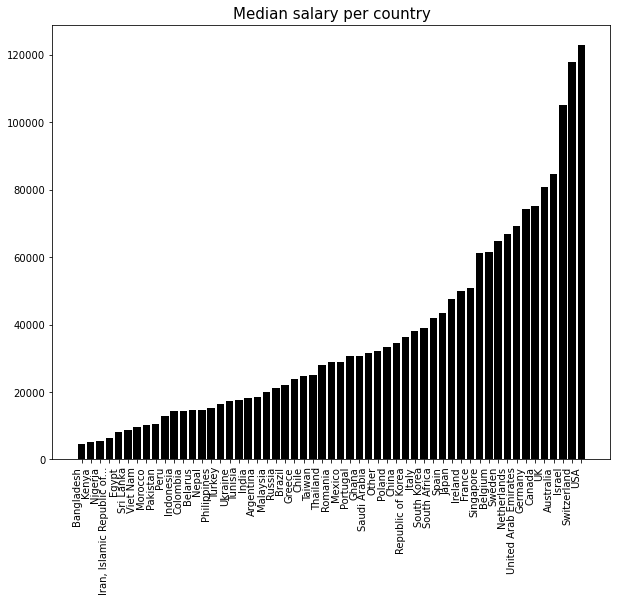

In [129]:
# Generating a new data frame
median_salary_df_1 = [DataFrame['Q3'], DataFrame['Q24'], DataFrame['Q5']]
headers = ["Country", "Salary", 'Role']
median_salary_df = pd.concat(median_salary_df_1, axis=1, keys=headers).dropna(axis=0)
median_salary_df = median_salary_df.iloc[1: , :]
median_salary_df = median_salary_df[(median_salary_df['Role'] != 'Student') & (median_salary_df['Role'] != 'Other')]
# Transforming salary row
median_salary_df['Salary'] = median_salary_df['Salary'].apply(transform_salary_range)
# Getting mean of the salary column
salary = median_salary_df.groupby('Country').mean().sort_values(by='Salary')

# chart plot
a4_dims = (10, 8)
fig, ax = pyplot.subplots(figsize=a4_dims) 
ax.bar(salary.index, salary['Salary'], color = 'black')
ax.set_title('Median salary per country')
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.rc('xtick', labelsize=5)  
plt.rc('ytick', labelsize=5)
pyplot.show()

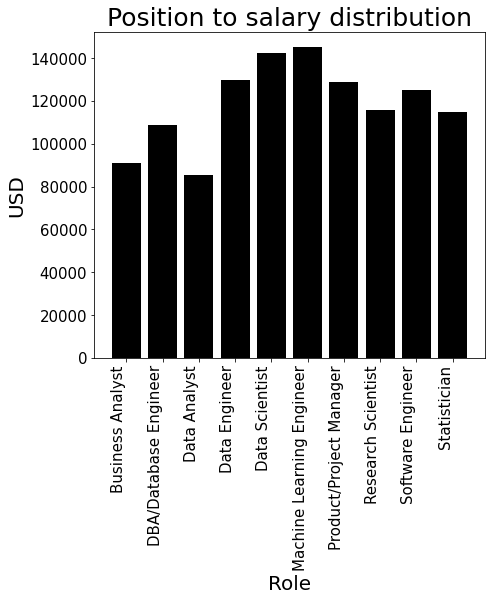

In [131]:
position_salary_distribution = median_salary_df[median_salary_df['Country'] == 'USA'].groupby('Role').mean().squeeze()
plot_simple_bar(position_salary_distribution, 'Role', 'USD', "Position to salary distribution")

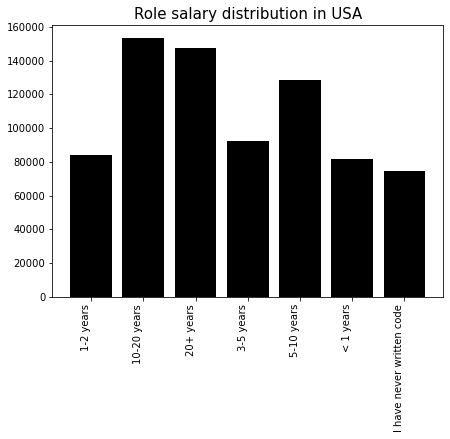

In [142]:
salary_to_role_and_age = [DataFrame['Q3'], DataFrame['Q24'], DataFrame['Q5'], DataFrame['Q6']]
headers = ["Country", "Salary", 'Role', 'Experience']
salary_to_role_and_age = pd.concat(salary_to_role_and_age, axis=1, keys=headers).dropna(axis=0)
salary_to_role_and_age = salary_to_role_and_age.iloc[1: , :]
salary_to_role_and_age = salary_to_role_and_age[(salary_to_role_and_age['Country'] == "USA") & (salary_to_role_and_age['Role'] != 'Student') & (salary_to_role_and_age['Role'] != 'Other')]
salary_to_role_and_age = salary_to_role_and_age.drop(['Country'], axis=1)
salary_to_role_and_age['Salary'] = salary_to_role_and_age['Salary'].apply(transform_salary_range)

a4_dims = (7, 5)
fig, ax = pyplot.subplots(figsize=a4_dims) 
ax.bar(salary_to_role_and_age.groupby('Experience').mean()['Salary'].index, salary_to_role_and_age.groupby('Experience').mean()['Salary'],   color = 'black')
ax.set_title('Role salary distribution in USA')
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')

pyplot.show()


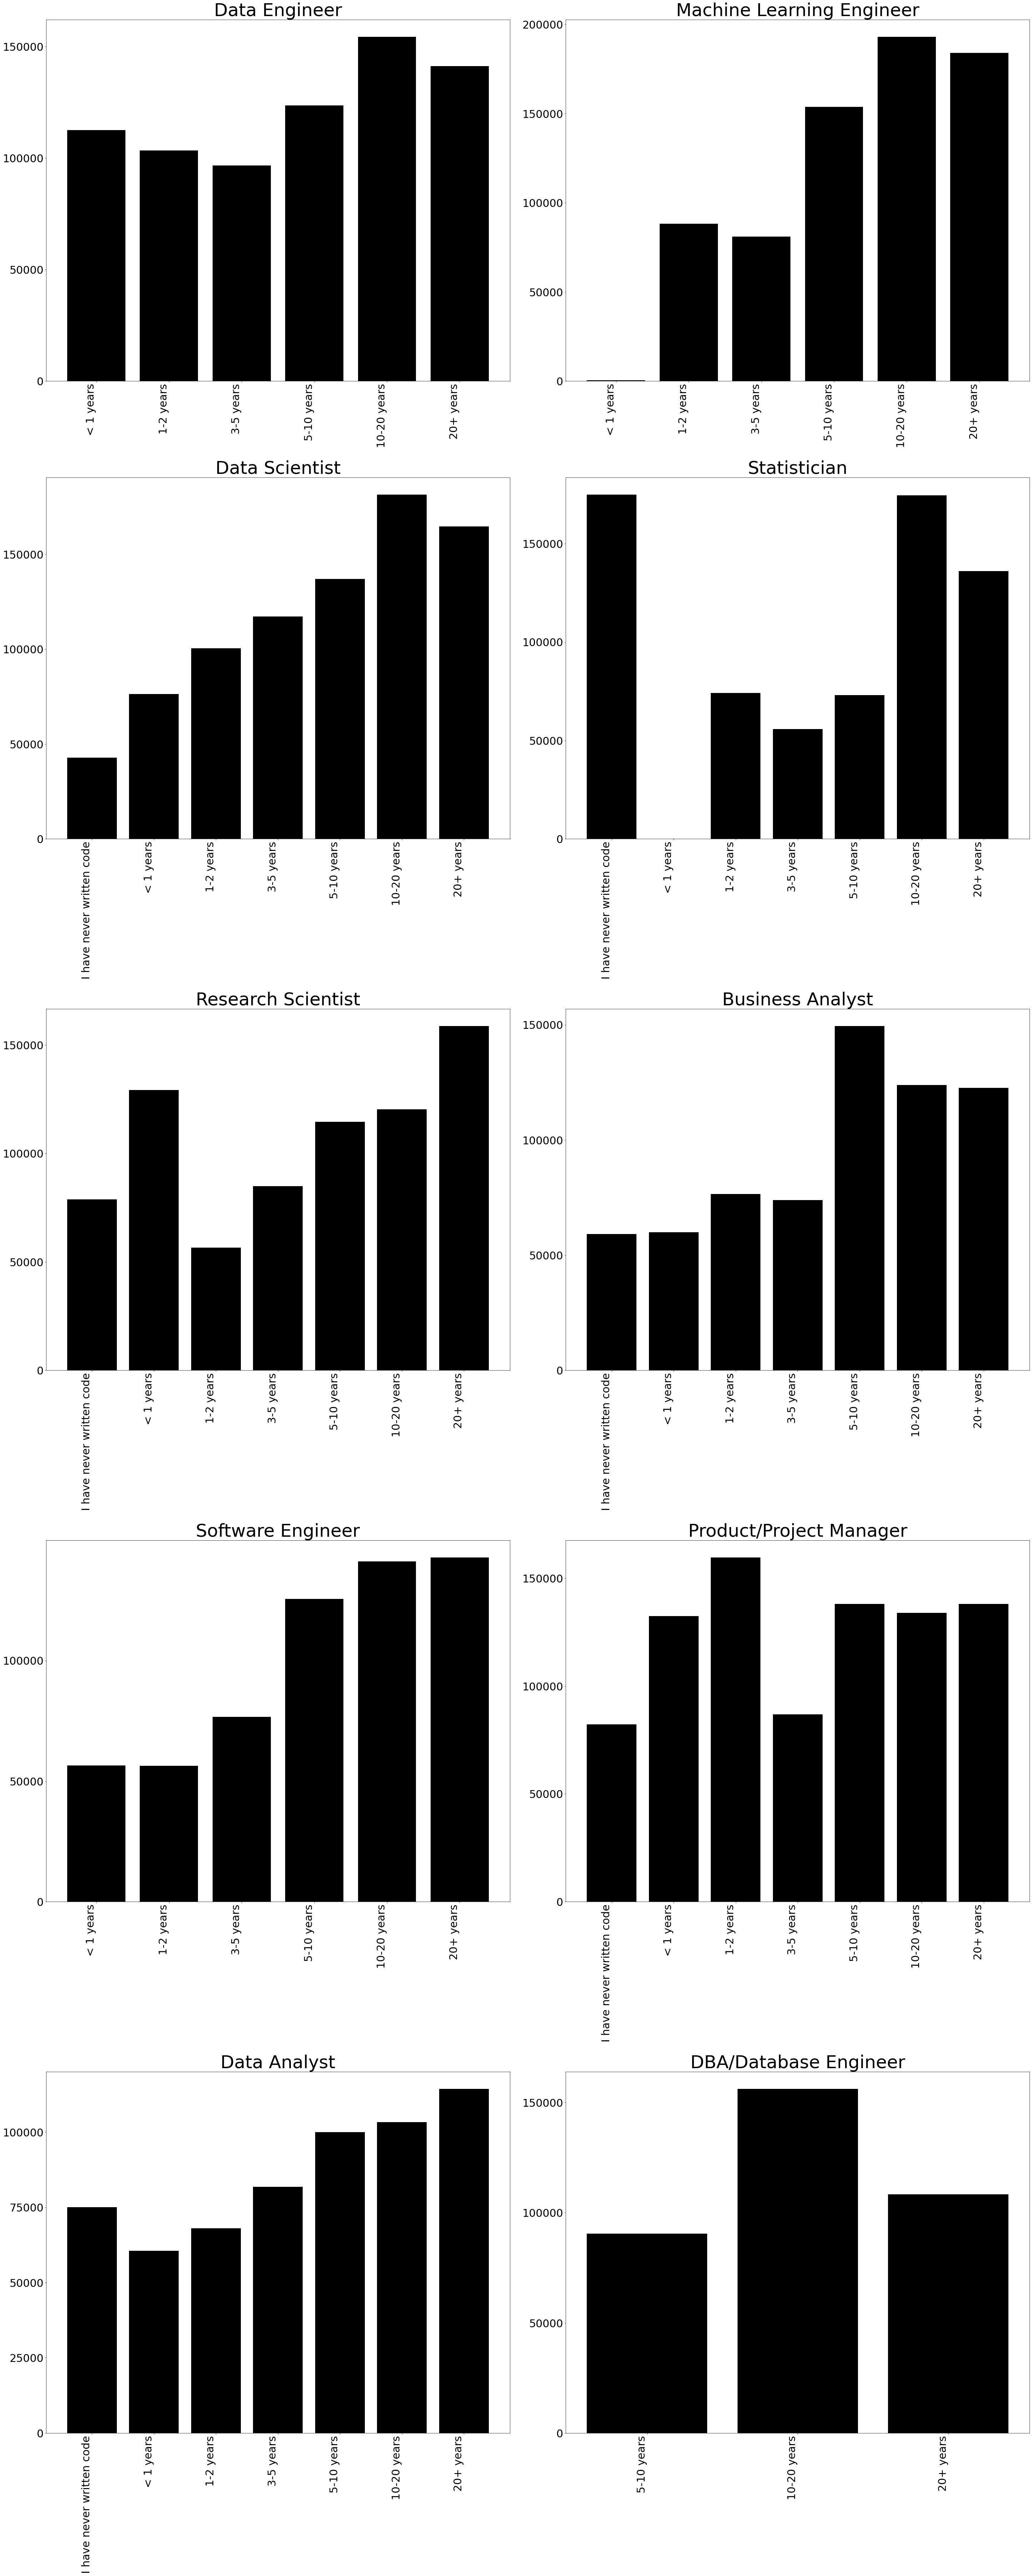

In [137]:
salary_to_role_and_age

a4_dims = (40, 100)
fig, ax = pyplot.subplots(5, 2, figsize=a4_dims, constrained_layout=True) 

for i, Role in enumerate(list(salary_to_role_and_age.Role.unique())):
    
    order = ['I have never written code', '< 1 years','1-2 years','3-5 years','5-10 years','10-20 years' , '20+ years']
    
    data = salary_to_role_and_age[salary_to_role_and_age['Role']==Role].groupby('Experience').mean().reindex(order)
    
    ax[i%5][i//5].bar(data.index, data['Salary'],  
                  color = 'black')
    ax[i%5][i//5].set(xlabel='', ylabel='')
    ax[i%5][i//5].set_title(Role, fontsize=50)
    plt.setp(ax[i%5][i//5].get_xticklabels(), rotation=90, horizontalalignment='right')
    plt.rc('xtick', labelsize=100)  
    plt.rc('ytick', labelsize=100)
    
pyplot.show()

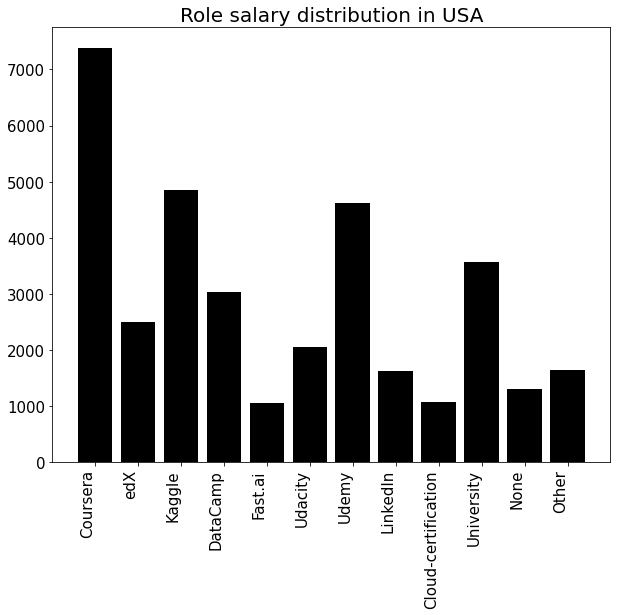

In [166]:
courses = DataFrame.iloc[1:, 231:243]
multiple_row_plot(courses)


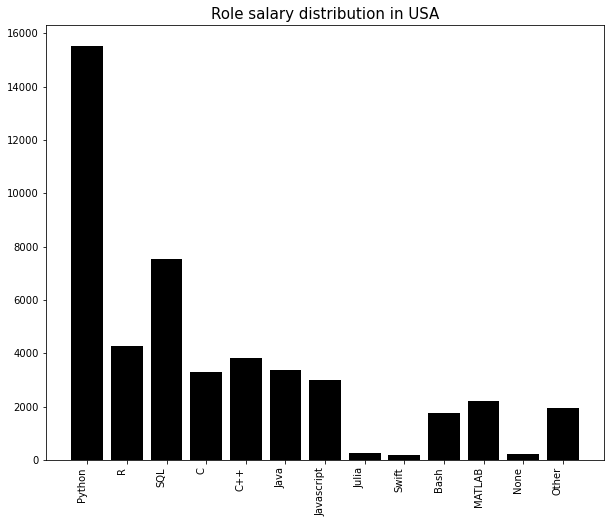

In [143]:
programming_language = DataFrame.iloc[1:, 7:20]
multiple_row_plot(programming_language)

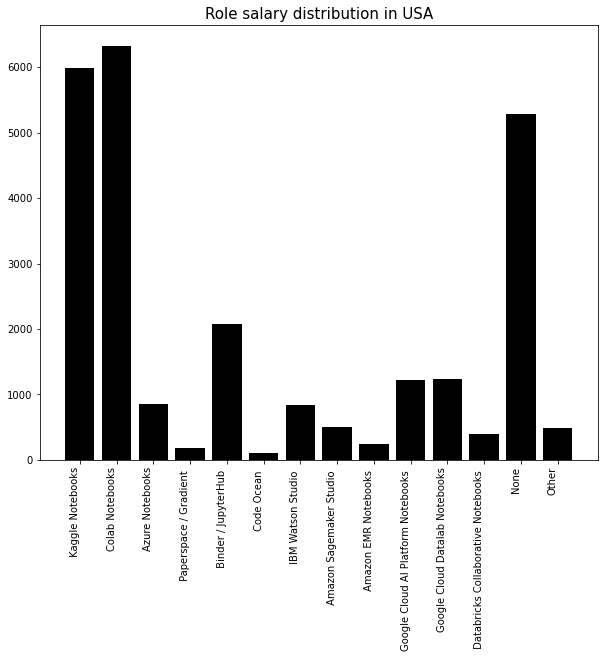

In [144]:
Integrated_development_environments = DataFrame.iloc[1:, 33:47]
multiple_row_plot_2(Integrated_development_environments)

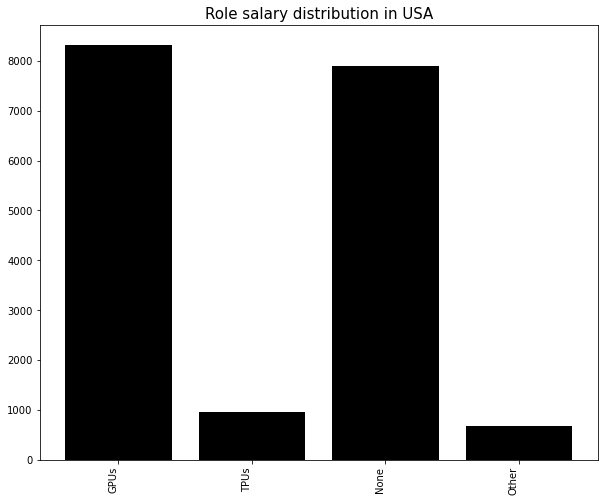

In [145]:
special_hardware = DataFrame.iloc[1:, 48:52]
multiple_row_plot_2(special_hardware)

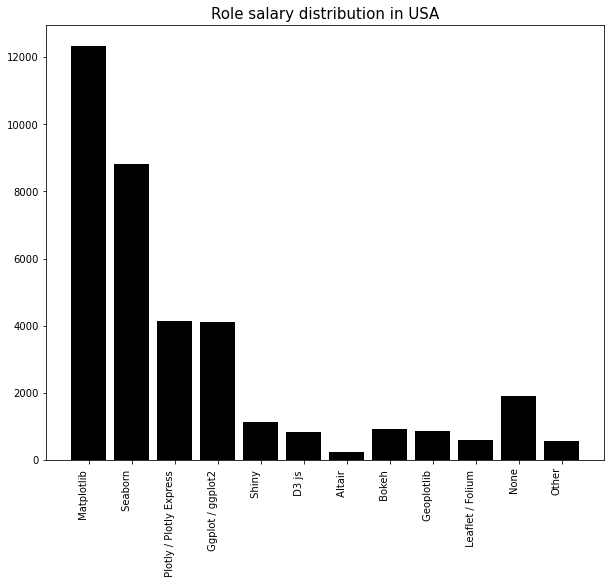

In [146]:
vis = DataFrame.iloc[1:, 53:65]
multiple_row_plot_2(vis)